In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100) # Ekrana gösterilecek feature sayisi 100


# Regularization (Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

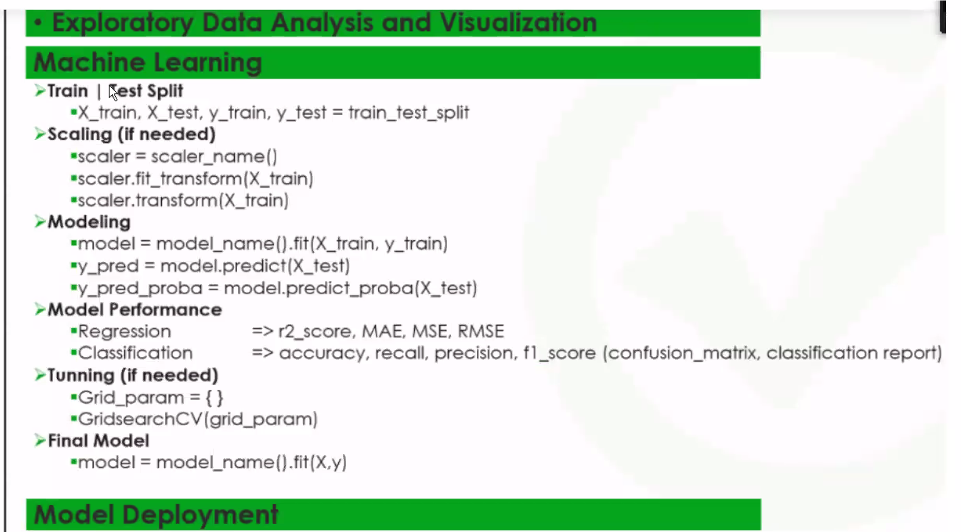

Ridge: katsiyi degerini azaltir, ama feature kalir.

Lasso: etkisi az olan feature lari siler. Onun icin bunu kullanabiliriz.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
X = df.drop("sales", axis=1)
y = df["sales"]

## Polynomial Conversation

In [4]:
# Lasso ve Ridge icin degerlendirmek üzere mevcut data stinden yeni feature lar üretelim

from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [6]:
poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape  # uretilen feature sayisi 52, toplam 55

(200, 55)

## Train | Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features,y, test_size=0.3, random_state=101)

## Scaling Data

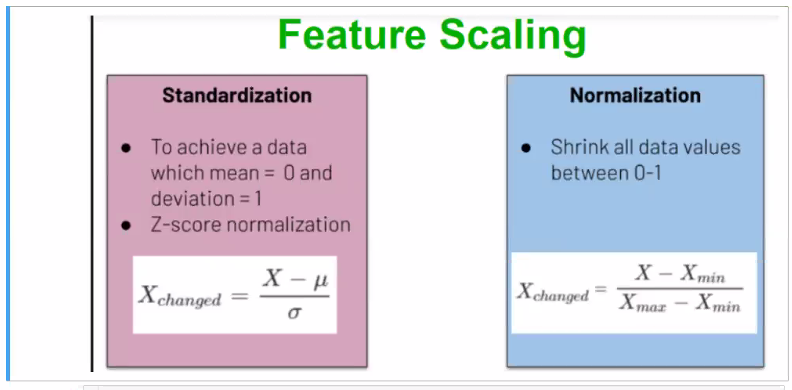

normalization ---> neural network + dummies feature + robust scaler

outlier lar cok isie robustscaler, veri setinin dagilimi normale yakinsa StandartScaler, belli bir araliga sikistirma islemi varsa MinMax Scaler

standardization ----> ML

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

# target variable a lineer ve logistic regresyonlarda scale yapilmaz 

In [12]:
scaler.fit(X_train)   # daha önceden bilinen fit islemi yapilmayacak. 
                     # X_train icinde gezinerek std ve mean degerlrini alacak
# Not: scale islemini X_traine uygulayacagiz. daha sonra test'e uygulayacagiz. Ayri ayri scale yapacagiz
# X_train de hesapladigi std ve mean degerlerine gore Test datasini donusturecek

StandardScaler()

In [13]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

 # UST KISIMDA ELDE EDİLEN MEAN-STD DEGERLERİNİ DATAYA TRANSFER EDİP ZSKORU OLUŞTURUYORUZ

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [14]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# X_train ile elde edilen mean-std degerine göre X_test i scale ediyoruz.

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

## Checking mean = 0 and StdDev =1 ??

In [17]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).      round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
